# EXPLORATORY DATA ANALYSIS

In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation

In [195]:
# load dataset into a pandas dataframe
data = pd.read_csv('https://raw.githubusercontent.com/SaravananJaichandar/Credit-Risk-Model/master/german_credit_data.csv')
data
data.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [196]:
# print the shape of the dataset
data.shape

(1000, 10)

In [197]:
# print the top 10 rows of dataset
data.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,NaN,NaN,9055,36,education
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,7,35,male,3,rent,little,moderate,6948,36,car
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,9,28,male,3,own,little,moderate,5234,30,car


In [198]:
# print the bottom 10 rows of dataset
data.tail(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
990,990,37,male,1,own,NaN,NaN,3565,12,education
991,991,34,male,1,own,moderate,NaN,1569,15,radio/TV
992,992,23,male,1,rent,NaN,little,1936,18,radio/TV
993,993,30,male,3,own,little,little,3959,36,furniture/equipment
994,994,50,male,2,own,NaN,NaN,2390,12,car
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV
999,999,27,male,2,own,moderate,moderate,4576,45,car


In [199]:
# It looks that the first column is simply an index which can be deleted. 

data.drop(data.columns[0], inplace=True, axis=1)
print(); print(data.head())


   Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  
0         6             radio/TV  
1        48             radio/TV  
2        12            education  
3        42  furniture/equipment  
4        24                  car  


In [200]:
# How many missing values are in each column and of what data types they are?

print(); print("Database has {} obserwations (customers) and {} columns (attributes).".format(data.shape[0],data.shape[1]))
print(); print("Missing values in each column:\n{}".format(data.isnull().sum()))
print(); print("Columns data types:\n{}".format(data.dtypes))


Database has 1000 obserwations (customers) and 9 columns (attributes).

Missing values in each column:
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

Columns data types:
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object


In [201]:
# Check Number of unique values

n_unique = data.nunique()
print(); print("Number of unique values:\n{}".format(n_unique))


Number of unique values:
Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
dtype: int64


In [202]:
# Check Unique values in each categorical column
print(); print("Unique values in each categorical column:")
for col in data.select_dtypes(include=[object]):
    print(); print(col,":", data[col].unique())


Unique values in each categorical column:

Sex : ['male' 'female']

Housing : ['own' 'free' 'rent']

Saving accounts : [nan 'little' 'quite rich' 'rich' 'moderate']

Checking account : ['little' 'moderate' nan 'rich']

Purpose : ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


In [203]:
# print the top five rows of the dataset
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


# 1. How do people purchase credit with regards to duration ?

In [204]:
def scatters(data, h=None, pal=None):
    fig, (ax1) = plt.subplots(1,1, figsize=(10,4))
    sns.scatterplot(x="Credit amount", y="Duration", hue=h, palette=pal, data=data, ax=ax1)

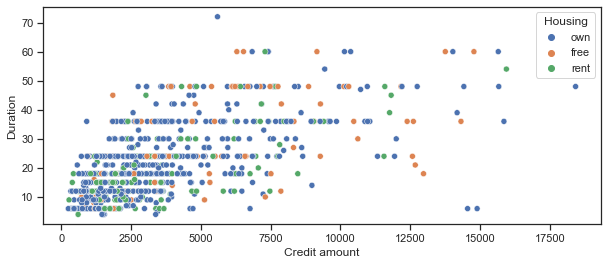

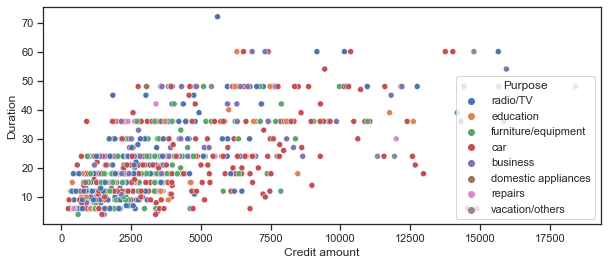

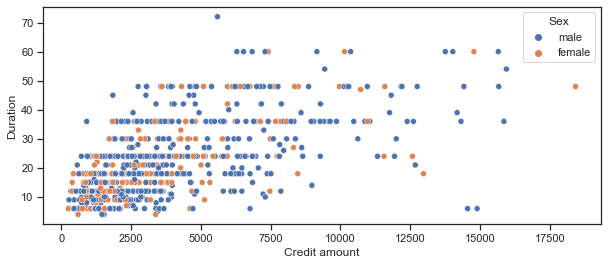

In [205]:
# Plot the distribution of the categorical column Housing
scatters(data, h="Housing")
# Plot the distribution of the categorical column Purpose
scatters(data, h="Purpose")
# Plot the distribution of the categorical column Sex
scatters(data, h="Sex")

From visual inspection, it seems that there is some positive correlation between duration and amount of credit irrespective of categorization and we can check the linear correlation between credit amount and duration


The linear correlation between credit amount and duration: 
(0.6249841983009835, 1.8628512880465833e-109)


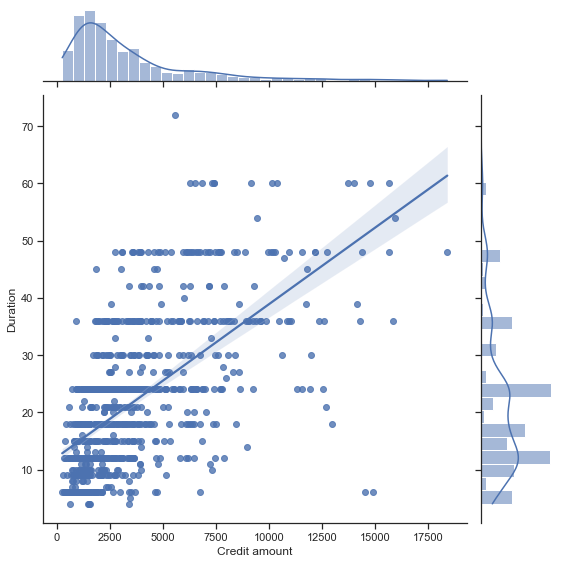

In [206]:
import scipy.stats as stats

print(); print("The linear correlation between credit amount and duration: ")
print(stats.pearsonr(data["Credit amount"], data["Duration"]))

r1 = sns.jointplot(x="Credit amount",y="Duration", data=data, kind="reg", height=8)
#r1.annotate(stats.pearsonr)
plt.show()

The plot above shows a linear correlation with Pearson value of 0.62 and very small p-value. 
That make’s sense because usually, people take bigger credits for longer periods. 
Below I will analyse linear regression plots with various categorisations.

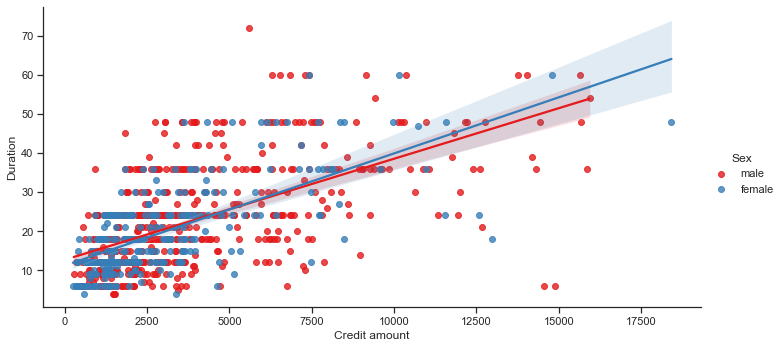

In [207]:
sns.lmplot(x="Credit amount",y="Duration", hue="Sex", data=data, palette="Set1", aspect=2)
plt.show()

The plot above indicates that there is no significant difference between men and women.

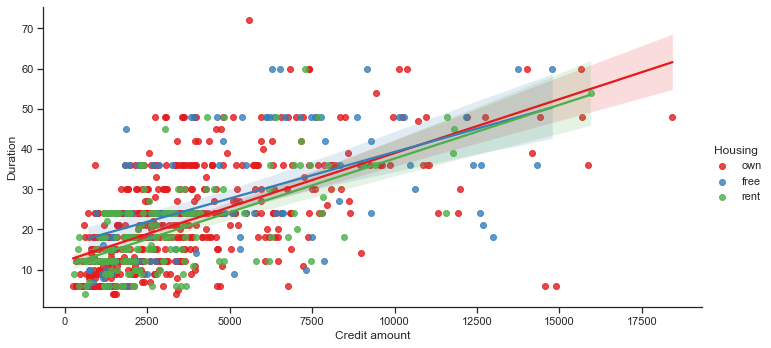

In [208]:
sns.lmplot(x="Credit amount",y="Duration", hue="Housing", data=data, palette="Set1", aspect=2)
plt.show()

The plot above shows similarly that there is no diference betwen housing categories.

# 2. For what purpose where credits frequently granted ?

               Purpose  Count
1                  car    337
5             radio/TV    280
4  furniture/equipment    181
0             business     97
3            education     59
6              repairs     22
2  domestic appliances     12
7      vacation/others     12


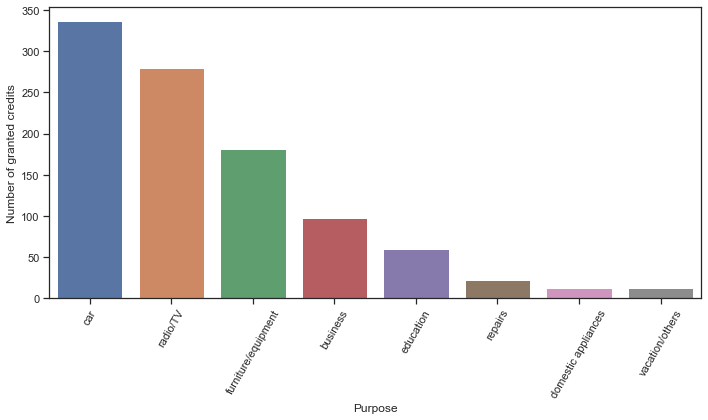

In [209]:
# count the number of rows of the Age column with regards to grouping by purpose
#sort count column in descending order
n_credits = data.groupby("Purpose")["Age"].count().rename("Count").reset_index()
n_credits.sort_values(by=["Count"], ascending=False, inplace=True)
print(n_credits)

# plot n_credits data with (x asis purpose) and (Y axis Count) 
plt.figure(figsize=(10,6))
bar = sns.barplot(x="Purpose",y="Count",data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
plt.ylabel("Number of granted credits")
plt.tight_layout()

In [224]:
def boxes(x,y,h,r=45):
    fig, ax = plt.subplots(figsize=(12,6))
    box = sns.boxplot(x=x,y=y, hue=h, data=data)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()


# 3. What Job Category takes bigger creddit amount?

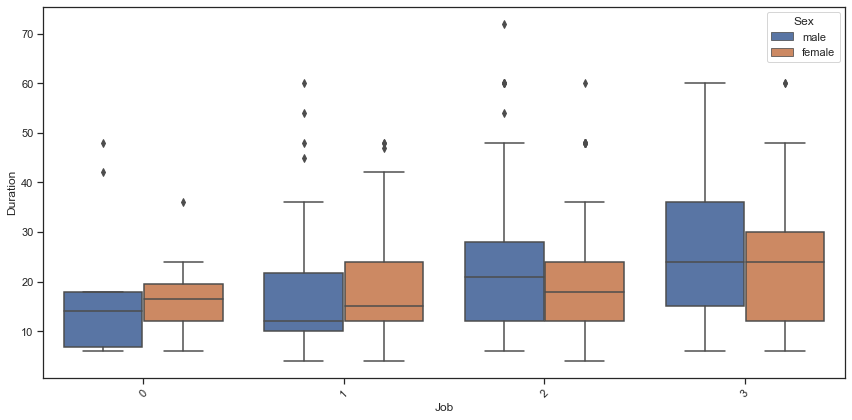

In [211]:
# Now we will generate few boxplots for detailed analysis of categorical variables
# box plot of categorical variables sex, xasis = Job and Yaxis = Sex
boxes("Job","Duration","Sex")

In terms of job category once again there is no difference between men and women, 
but we can see that job category 3 tends to take bigger credit amounts for longer duration.

# 4. What Business interpretation can we deduce from customer segmentation?

In [212]:
# For clustering, a subset containing only numerical variables (Age, Credit amount, Duration) has been created.

In [213]:
#Selecting columns for clusterisation with k-means
selected_cols = ["Age","Credit amount", "Duration"]
cluster_data = data.loc[:,selected_cols]

In [214]:
#Let's create a function which plots three histograms - one for each variable.
def distributions(df):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.distplot(df["Age"], ax=ax1)
    sns.distplot(df["Credit amount"], ax=ax2)
    sns.distplot(df["Duration"], ax=ax3)
    plt.tight_layout()

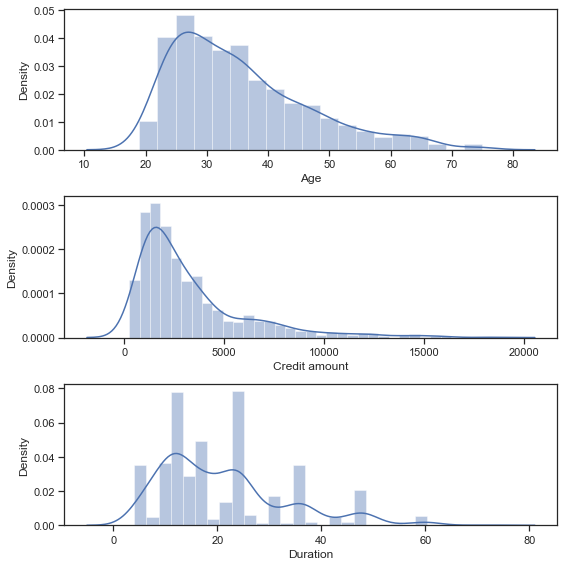

In [215]:
distributions(cluster_data)

We can see that distributions are right-skewed. 
To obtain better results we should remove the skewness by logarithmic transformation. 
After that let's see how they look like.

pandas.core.frame.DataFrame

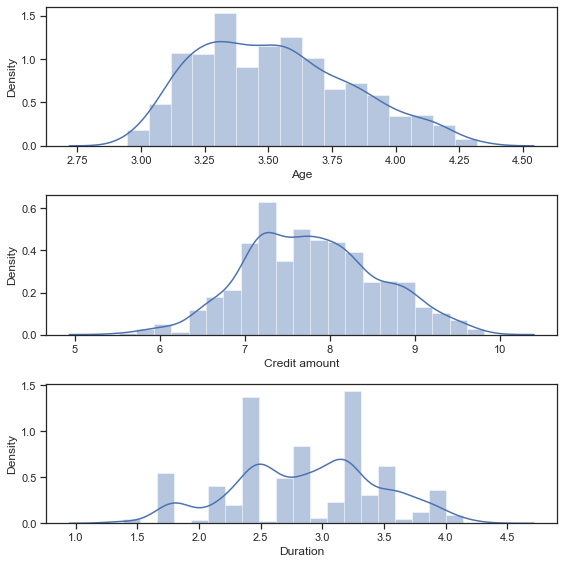

In [216]:
# plot distribution of Age, Credit amount and Duration
cluster_log = np.log(cluster_data)
distributions(cluster_log)
type(cluster_log)

Indeed, the skewness has been eliminated.
The next step will be centering and scaling of variables 
it is required by KMeans algorithm. We will use for that a StandardScaler from sklearn library.

In [217]:
# Cluster scaled is a list of lists where the three elements of the sublists 
# are the column axis content of cluster_scaled and the elements of the main list 
# are the rows. 
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_log)
cluster_scaled

array([[ 2.27100592, -0.933901  , -1.86486906],
       [-1.44615223,  1.16304581,  1.7083687 ],
       [ 1.22669602, -0.1815588 , -0.67378981],
       ...,
       [ 0.37810951, -1.4161991 , -0.67378981],
       [-1.29778048, -0.34591111,  1.59746802],
       [-0.76258638,  0.82450846,  1.59746802]])

# Clustering with Affinity Propagation
In this algorithm there are two relevant parameters: preference and dumping. It means that we don’t define upfront number of clusters, algorithm itself chooses their number.

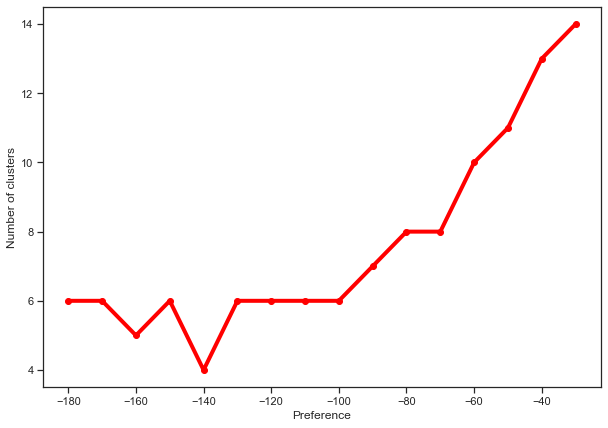

In [218]:
preferences = np.arange(-30,-190,-10)
clusters = []

for p in preferences:
    af = AffinityPropagation(preference=p, damping=0.6, max_iter=400, verbose=False).fit(cluster_scaled)
    labels_af = pd.DataFrame(af.labels_)
    clusters.append(len(af.cluster_centers_indices_))

plt.figure(figsize=(10,7))
plt.xlabel("Preference")
plt.ylabel("Number of clusters")
plt.plot(preferences,clusters, marker='o', linewidth=4, color = 'red')

Together with decreasing value of preference parameter number of clusters goes down as well and levels for very small preference values. Let's check four clusters option.

In [219]:
af = AffinityPropagation(preference=-140, damping=0.6, verbose=False).fit(cluster_scaled)
labels_af = pd.DataFrame(af.labels_)
n_clusters_ = len(af.cluster_centers_indices_)

clustered_data_af = cluster_data.assign(Cluster=labels_af)

Let's show clusters on the scatter plot.

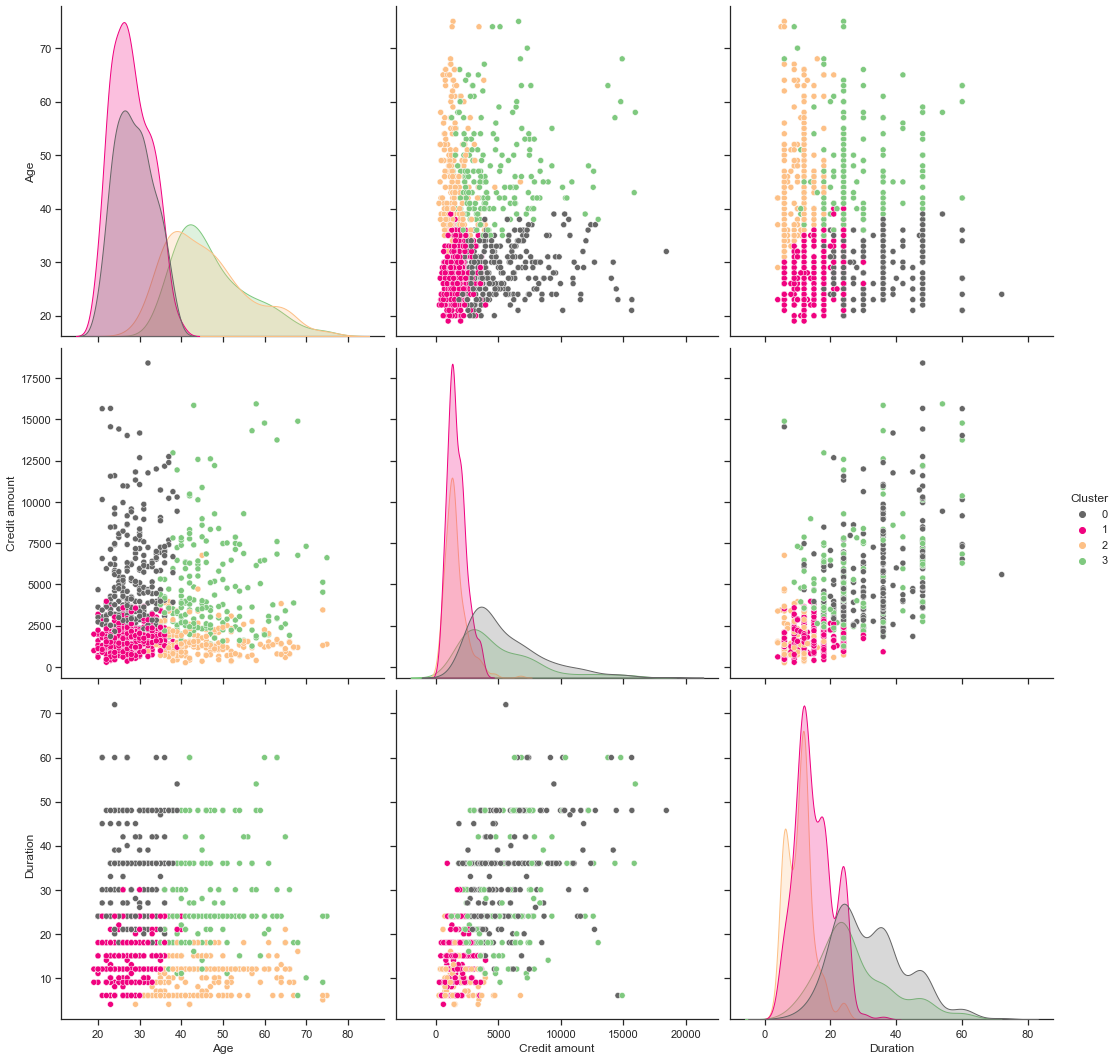

In [223]:
sns.set(style="ticks")
sns.pairplot(clustered_data_af, hue='Cluster', height = 5, palette = 'Accent_r')

There is a clear separation for the Credit_amount/Age  and Age/Duration Plots but no evidence of separation for Credit_ amount/Duration Plots

Let's generate now a table for easier interpretation of customer segmentation

In [222]:
grouped_km = clustered_data_af.groupby(['Cluster']).mean().round(1)
grouped_km

,Age,Credit amount,Duration
Cluster,,,
0,28.7,5593.7,32.2
1,27.9,1654.3,15.1
2,46.0,1551.7,10.7
3,47.5,4977.9,27.6


Cluster 0 – high mean of credit amount, long duration, younger customers

Cluster 1 – low mean of credit amount, short duration, younger customers

Cluster 2 - low mean of credit amount, short duration, older customers

Cluster 3 - high mean of credit amount, middle-time duration, older customers